# Classification in Practice

In this laboratory session we will gain some experience working with linear models for **classification** (we already saw how to do regression in a previous lab).

We will follow the same general structure... with one exception -- for this laboratory we will begin with **synthetic** datasets. 

## Part 1: Working with Synthetic Classification Problems

Generating synthetic datasets allows us to gain insight into how classifiers work. We will use some functionality of Scikit-learn to generate -- in a controlled manner -- synthetic classification problems of with various characteristics.

**Note**: When working with these synthetic datasets we will *not* go to the trouble of generating train/test splits -- we are only interested in studying how classifiers work to **separate** the training data.

### Exercise 1.1: Generating a dataset

First, have a look at the documentation for [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs). This is one of the easiest ways to generate /simple/ classification problems. Study the documentation and then use `make_blobs` to generate an **EASY** dataset for a **two-class** classification problem with 100 samples per class and 2 input features. What does **EASY** mean? How can we determine, qualitatively, that the randomly generated dataset is "easy"?

**Hint**: You will probably want to develop a *visualization* for datasets, and then *abstract* it into a function you can call later for other datasets. 

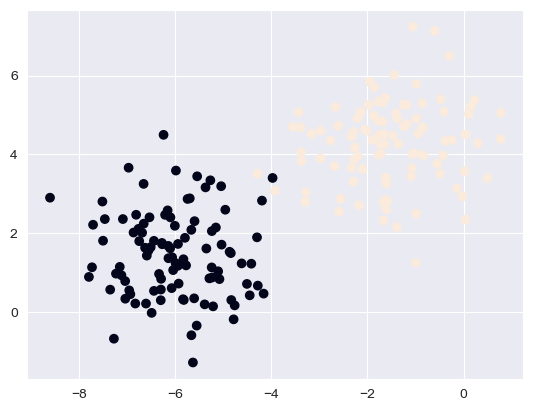

In [1]:
# Your code here.
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

(Xs_easy, ys_easy) = make_blobs([100,100], n_features = 2) 

def plot_data(data, y):
    _ = plt.scatter(data[:,0], data[:,1], c = y)
    
plot_data(Xs_easy, ys_easy)

In questo caso il dataset è definito **easy** perchè è linearmente separabile. Questo si evince molto bene dal plot del dataset, poichè si riesce a vedere che una retta può tranquillamente separare in modo corretto le 2 classi

### Exercise 1.2: "Solving" the dataset

Train a classifier that is *perfectly* classifies the dataset you created above. Any of the the three classifiers mentioned in the *Capsule Lecture* should do well. Try one, or try all three. Be sure to verify that the classifier does *indeed* classify all training points correctly.

**Hint**: You might want to look at [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for this.

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error

# Your code here.
def classifier(model, Xs, ys):
    pred = model.predict(Xs)
    #controllando gli errori, verifico che il classificatore classifichi effettivamte tutti i punti di training in modo corretto
    RMSE = mean_squared_error(ys, pred)
    MAE = mean_absolute_error(ys, pred)
    print('RMSE: ' + str(RMSE) + '   MSE: ' + str(MAE))  
    print(classification_report(ys, pred, zero_division = 1))

LDA_easy = LinearDiscriminantAnalysis().fit(Xs_easy, ys_easy)
QDA_easy = QuadraticDiscriminantAnalysis().fit(Xs_easy, ys_easy)
SVM_easy = LinearSVC().fit(Xs_easy, ys_easy)
    
classifier(LDA_easy, Xs_easy, ys_easy)
classifier(QDA_easy, Xs_easy, ys_easy)
classifier(SVM_easy, Xs_easy, ys_easy)

RMSE: 0.015   MSE: 0.015
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.99      0.98      0.98       100

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200

RMSE: 0.005   MSE: 0.005
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.99      1.00      1.00       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

RMSE: 0.005   MSE: 0.005
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.99      1.00      1.00       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200

### Exercise 1.3: Visualizing the decision surfaces

One of the best ways to understand how a classifier works is to visualize the decision boundaries. Use [sklearn.inspection.DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) to create a visualization of the *dataset* and the *decision boundaries* for your classifier.

**Note**: This is another great opportunity to apply *functional abstraction* and make a **reusable** visualization that you can reuse (for example in the next exercise).

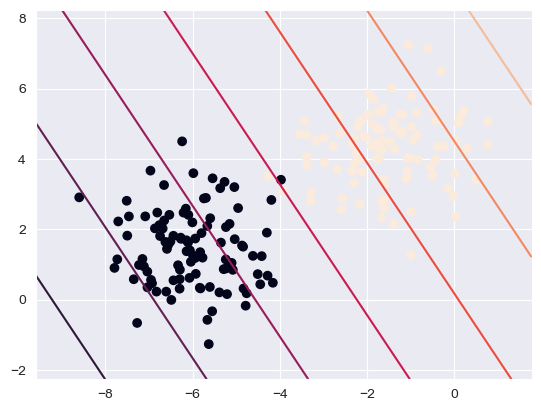

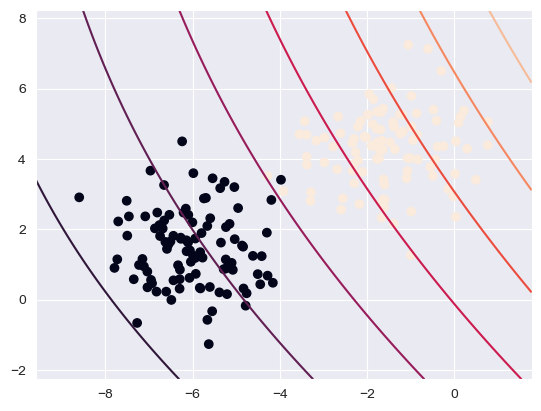

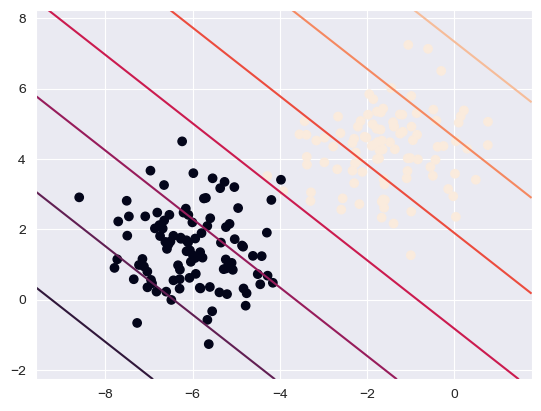

In [3]:
from sklearn.inspection import DecisionBoundaryDisplay

# Your code here.
def plot_decision_boundary(model, X, y):
    disp = DecisionBoundaryDisplay.from_estimator(model, X, response_method="decision_function", plot_method='contour')
    plot_data(X, y)

plot_decision_boundary(LDA_easy, Xs_easy, ys_easy)
plot_decision_boundary(QDA_easy, Xs_easy, ys_easy)
plot_decision_boundary(SVM_easy, Xs_easy, ys_easy)

### Exercise 1.4: A harder dataset

Repeat the exercises above, but first generate a **hard** dataset that is not linearly separable. Observe how linear classifiers fail to correctly classify the training data. How can we make these classifiers capable of "solving" this harder dataset?

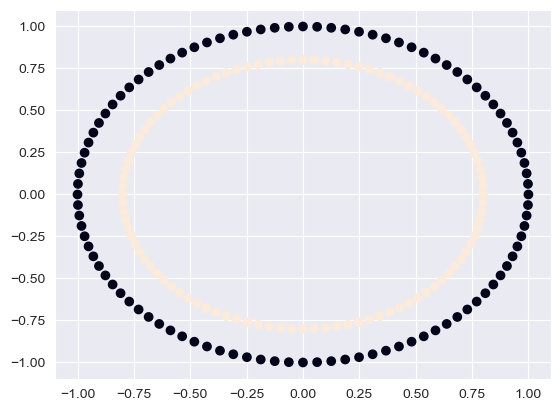

In [4]:
# Your code here.
from sklearn.datasets import make_circles

(Xs_hard, ys_hard) = make_circles([100,100])
plot_data(Xs_hard, ys_hard)

In [5]:
LDA_hard = LinearDiscriminantAnalysis().fit(Xs_hard, ys_hard)
QDA_hard = QuadraticDiscriminantAnalysis().fit(Xs_hard, ys_hard)
SVM_hard = LinearSVC().fit(Xs_hard, ys_hard)

classifier(LDA_hard, Xs_hard, ys_hard)
classifier(QDA_hard, Xs_hard, ys_hard)
classifier(SVM_hard, Xs_hard, ys_hard)

RMSE: 0.5   MSE: 0.5
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       100
           1       0.50      0.50      0.50       100

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200

RMSE: 0.0   MSE: 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

RMSE: 0.51   MSE: 0.51
              precision    recall  f1-score   support

           0       0.49      0.56      0.52       100
           1       0.49      0.42      0.45       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted 

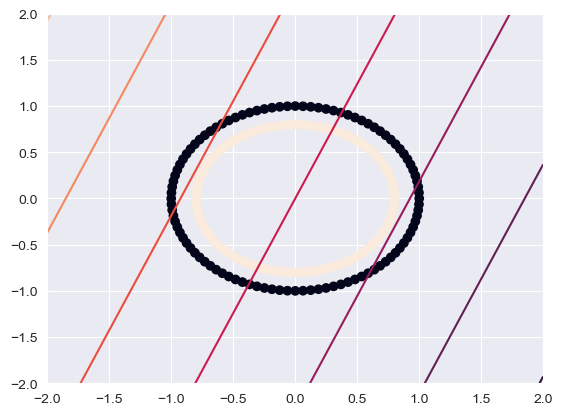

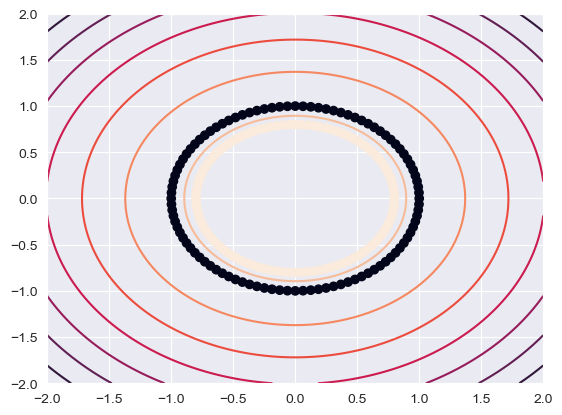

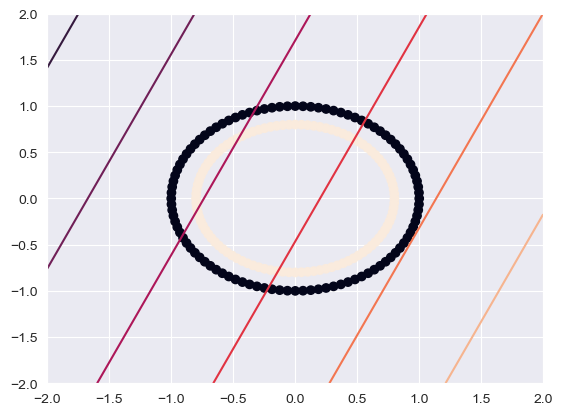

In [6]:
plot_decision_boundary(LDA_hard, Xs_hard, ys_hard)
plot_decision_boundary(QDA_hard, Xs_hard, ys_hard)
plot_decision_boundary(SVM_hard, Xs_hard, ys_hard)

Per creare un dataset che fosse non linearmente separabile, abbiamo utilizzato la funzione **make_circles()**. Possiamo notare che l'unico classificatore che separa correttamente le due classi è il QuadraticDiscriminantAnalysis. Per far predirre anche gli altri classificatori in modo corretto è necessario applicare un embedding. Quello che abbiamo utilizzato è un embedding che mappa i dati su un paraboloide in 3 dimensioni. Purtroppo il risultato non è visualizzabile, ma per vedere se funziona è possibile controllare se l'errore sul testing set è zero. Quindi in patica si crea una nuova features data da $x^{2} + y^{2}$ che forma il paraboloide e, successivamente, facendo il fit e calcolando l'errore vediamo che i classificatori separano in modo corretto le due classi.

In [7]:
import numpy as np

def feature(x,y):
    return(x**2 + y**2)

rows = Xs_hard.shape[0]
cols = Xs_hard.shape[1] + 1
size = np.array([rows, cols])
Xs_trans = np.zeros(size)
for i in range(Xs_hard.shape[0]):
    Xs_trans[i] = [Xs_hard[i][0], Xs_hard[i][1], feature(Xs_hard[i][0], Xs_hard[i][1])]

LDA_hard = LinearDiscriminantAnalysis().fit(Xs_trans, ys_hard)
QDA_hard = QuadraticDiscriminantAnalysis().fit(Xs_trans, ys_hard)
SVM_hard = LinearSVC().fit(Xs_trans, ys_hard)

classifier(LDA_hard, Xs_trans, ys_hard)
classifier(QDA_hard, Xs_trans, ys_hard)
classifier(SVM_hard, Xs_trans, ys_hard)

RMSE: 0.0   MSE: 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

RMSE: 0.0   MSE: 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

RMSE: 0.0   MSE: 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted av

/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


---
## Part 2: A Real Dataset

In the second set of exercises we will work with a classic dataset for classification: the Iris Flower Classification Dataset. It is a fairly easy dataset to work with since it is low-dimensional and small. We start by loading the dataset, and then proceed with our usual protocol: "playing" with the data, creating train/test splits, and building and evaluating a first classifier. 

In [8]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the iris classification dataset to get started.
ds = load_iris()

# Extract the features (Xs), targets (ys), and class names (labels).
Xs = ds.data
ys = ds.target
classes = ds.target_names

# Make a Pandas DataFrame too, just for shits and giggles.
df = pd.DataFrame(Xs, columns=ds.feature_names)
targets = pd.Series(ds.target)

### Exercise 2.1: Play with the data

Use everything we have learned about *exploratory data analysis* to study the nature and characteristics of this classification problem. Are the classes equally represented? How many features are there in input? **Be creative** and **summarize** your findings with analysis along the way.

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

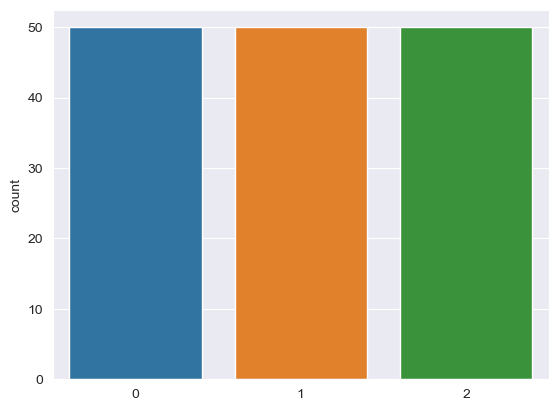

In [9]:
# Your data playground here.
import seaborn as sns
import matplotlib.pyplot as plt

def exploratory_data_analysis(ds, df, ys):
    print(ds.DESCR)
    print()
    print(ds.target_names)
    print()
    print(df.shape)
    print()
    df.describe()

    _ = sns.countplot(x = ys)
    plt.show()
    
        
exploratory_data_analysis(ds, df, ys)

Nella Number of Instances possiamo vedere che ci sono 150 istanze, 50 per ciascuna classe. Quindi possiamo affermare che le classi sono equamente rappresentate. Questo
lo possiamo anche visualizzare plottando i targets e controllando che per ogni classe ci siano esattamente 50 istanze. Inoltre notiamo che i target hanno nomi setosa, versicolor, virginica, che sono diversi tipi di fiori iris.

Sappiamo che il dataset ha 150 righe e 4 colonne.

In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Dalla tabella possimo vedere che i dati sono ridimensionati in modo simile. Quindi ci aspettiamo che i modelli con e senza regolarizzazione dei dati abbiano all'incirca le stesse performance.

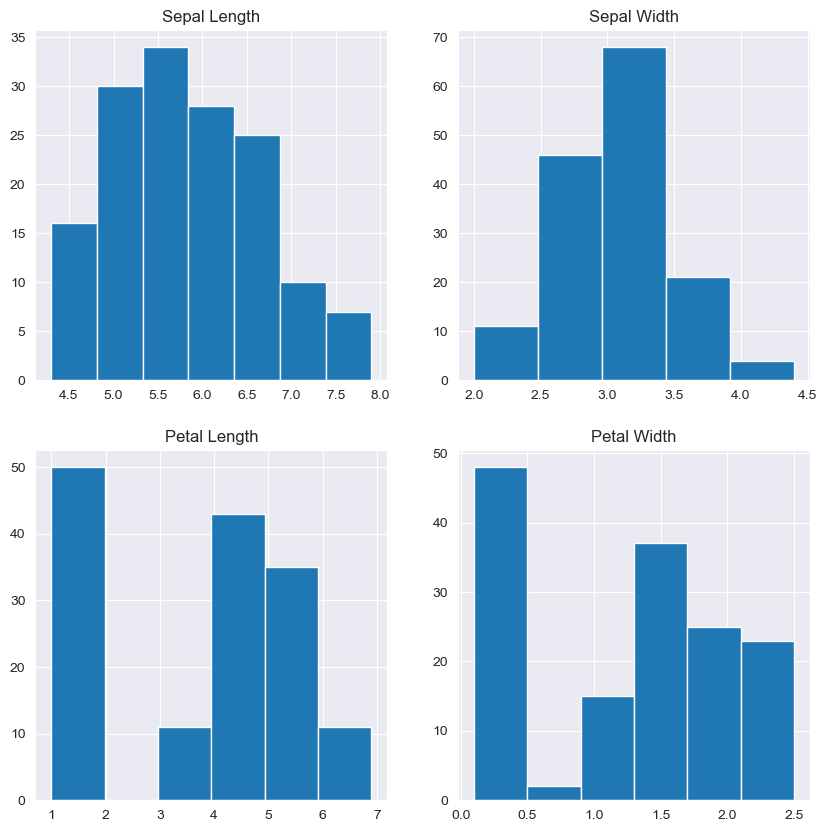

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['sepal length (cm)'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['sepal width (cm)'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['petal length (cm)'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['petal width (cm)'], bins=6);

Da questo plot possimo vedere che:
1. la frequenza più elevata di Sepal Length è compresa tra 30 e 35 e corrisponde ai valori compresi tra 5.5 e 6
2. la frequenza più elevata di Sepal Width è circa 70 e corrisponde ai valori compresi tra 3 e 3.5
3. la frequenza più elevata di Petal Length è circa 50 e corrisponde ai valori compresi tra 1 e 2
4. la frequenza più elevata di Petal Width è circa 50 e corrisponde ai valori compresi tra 0 e 0.5

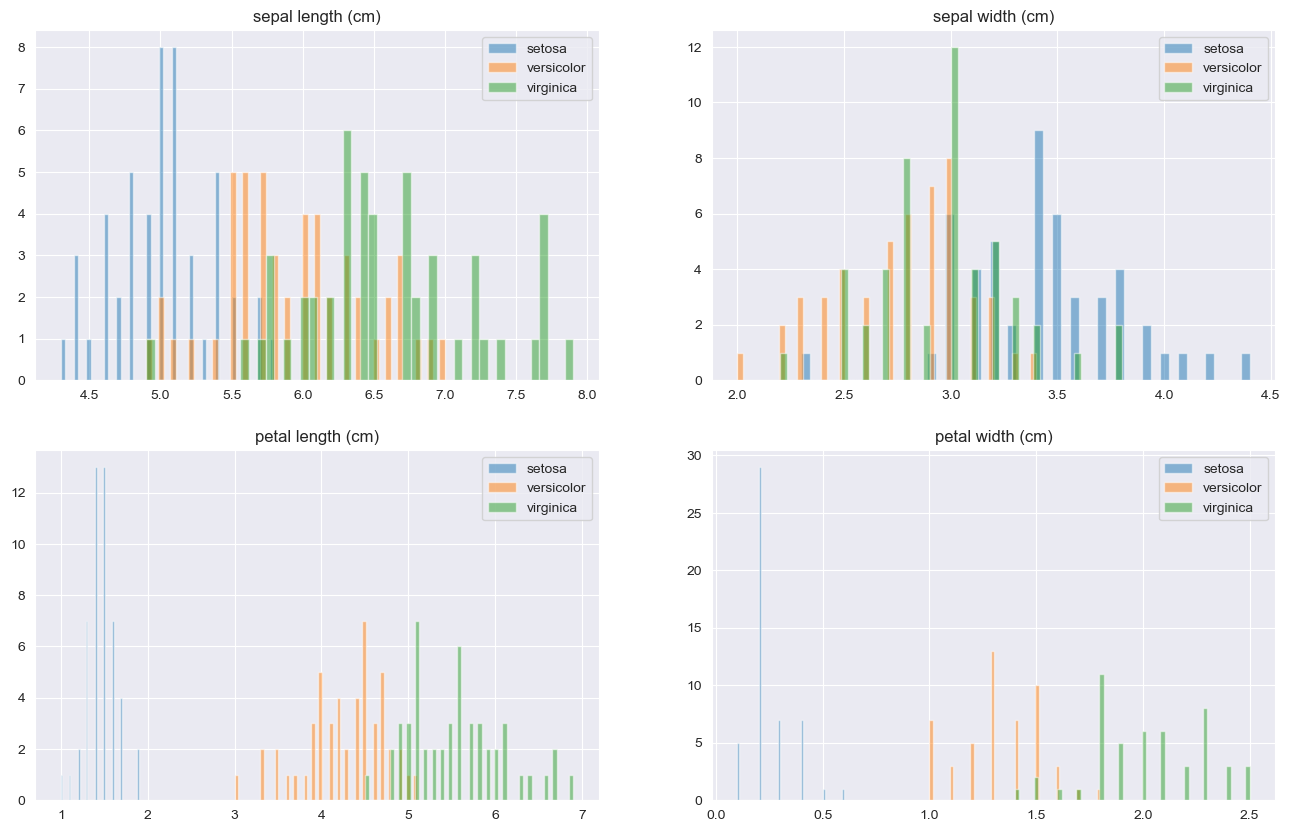

In [12]:
fig,ax = plt.subplots(2,2)
fig.set_size_inches(16,10)
    
for index,feature in enumerate(df.keys()):
    ax[int(index/2)][index%2].set_title(feature)
    ax[int(index/2)][index%2].hist(df[feature].iloc[:50],bins = 50, label="setosa", alpha=0.5)
    ax[int(index/2)][index%2].hist(df[feature].iloc[50:100],bins = 50, label="versicolor", alpha=0.5)
    ax[int(index/2)][index%2].hist(df[feature].iloc[100:],bins = 50, label="virginica", alpha=0.5)
    ax[int(index/2)][index%2].legend()

Da questo plot è possibile dedurre diverse cose sul dataset:
1. nel caso di Sepal Length possiamo vedere che c'è un overlapping abbastanza importante tra le 3 classi
2. ugualmente nella Sepal Width l'overlapping è molto importante
3. nel caso di Petal Length la classe *setosa* è molto distaccata dalle altre 2, e quindi sicuramente più facile da predire. Anche le altra due classi sono abbastanza separate, che se c'è un po' di overlapping
4. anche nel caso Petal Width la classe *setosa* è separata dalle altre due, che invece hanno un po' di overlapping intorno al valore 1.5

### Exercise 2.2: Your Turn

Design an experiment to decide which of the three classifiers we have seen performs best on this dataset. Some things to keep in mind:
+ You will probably want to use [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to perform K-fold cross-validation to ensure you are *robustly* estimating performance.
+ All three of the classifier models we have used support **regularization**, which might be an interesting hyperparameter to cross-validate. Unfortunately they use slightly different terminologies:
  + in `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` it is called `shrinkage`
  + in `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis` it is called `reg_param`
  + and in `sklearn.svm.LinearSVC` it is called `C` -- but the regularization performed is 1/C!
  
**Important**: Remember to *document* your findings and analyses along the way. Summarize and justify your final conclusions.

In [13]:
# Your code here.
from sklearn.model_selection import cross_val_score, validation_curve, learning_curve

# Creiamo una pipeline che mi permetta di plottare la validation curve
def validation_curve_pipeline(model,  Xs, ys, param_name, param_range, cv, n_jobs = 5):
    train_scores, test_scores = validation_curve(model, Xs, ys, param_name = param_name, param_range = param_range, cv = cv, n_jobs=n_jobs)
    # Calculating mean and standard deviation of training score
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with " + str(model))
    plt.xlabel(param_name)
    plt.ylabel("Score")
    lw = 2
    plt.semilogx(
        param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
    )

    plt.semilogx(
        param_range, test_scores_mean, label="Cross-validation score", color="green", lw=lw
    )
    plt.fill_between(
        param_range,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.2,
        color="green",
        lw=lw,
    )
    plt.legend(loc="best")
    plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

cv = KFold(5, shuffle=True)
# Creiamo una pipeline che mi permetta di fare la grid search per ogni modello
def grid_search_pipeline(model, X, y, param_name, values, cv):
    param_grid = {param_name: values}
    search = GridSearchCV(model, param_grid, cv=cv, verbose=0, n_jobs=-1)
    search.fit(X, y)
    print(f'modello: {model}')
    print(f'Best parameter: {search.best_params_}')
    print(f'Best cross-val score: {search.best_score_}')

[CV 2/5] END ....................shrinkage=1000.0;, score=nan total time=   0.0s
[CV 3/5] END ....................shrinkage=1000.0;, score=nan total time=   0.0s
[CV 4/5] END ....................shrinkage=1000.0;, score=nan total time=   0.0s
[CV 5/5] END ....................shrinkage=1000.0;, score=nan total time=   0.0s
[CV 1/5] END ........shrinkage=1389.4954943731361;, score=nan total time=   0.0s
[CV 2/5] END ........shrinkage=1389.4954943731361;, score=nan total time=   0.0s
[CV 3/5] END ........shrinkage=1389.4954943731361;, score=nan total time=   0.0s
[CV 4/5] END ........shrinkage=1389.4954943731361;, score=nan total time=   0.0s
[CV 2/5] END .........shrinkage=13894.95494373136;, score=nan total time=   0.0s
[CV 3/5] END .........shrinkage=13894.95494373136;, score=nan total time=   0.0s
[CV 4/5] END .........shrinkage=13894.95494373136;, score=nan total time=   0.0s
[CV 5/5] END .........shrinkage=13894.95494373136;, score=nan total time=   0.0s
[CV 1/5] END ........shrinka

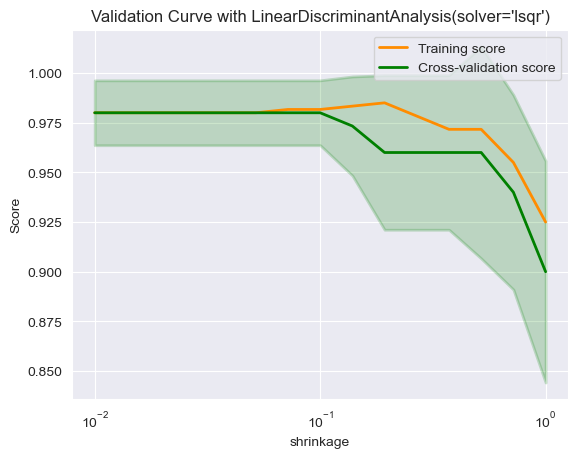

modello: LinearDiscriminantAnalysis(solver='lsqr')
Best parameter: {'shrinkage': 0.01}
Best cross-val score: 0.9800000000000001


/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
175 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
175 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 598, in fit
    self._solve_lsqr(
  File "/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 383, in _solve_lsqr
    self.covariance_ = 

In [24]:
model1 = LinearDiscriminantAnalysis(solver="lsqr")
validation_curve_pipeline(model1, Xs, ys, "shrinkage", np.logspace(-2, 0,50), cv)
grid_search_pipeline(model1,  Xs, ys, "shrinkage", np.logspace(-2,0,50), cv)

Per ogni tipologia di classifier diverso abbiamo plottato in scala logaritmica la *validation curve* e il risultato della *grid search* per capire che valore è migliore per la parametrizzazione. Qui andiamo ad analizzare il caso della **Linear Discriminant Analysis**. Dal plot possiamo vedere che per valori di *shrinkage* superiori a 0.1 le perfomance del modello diminuiscono, mentre per valori inferiori le performance rimangono molto elevate e intorno al 98%. Questo viene riconfermato anche dal risultato della grid search.
Possiamo notare dei warnings che riguardano il fallimento del fit di alcuni splits. Questo è dovuto al fatto che abbiamo settato il paramentro *solver* della *LinearDiscriminantAnalysis* pari a 'lsqr', che è necessario per poter effettuare la regolarizzazione. Tuttavia ponendo solver = svd il warning scompare

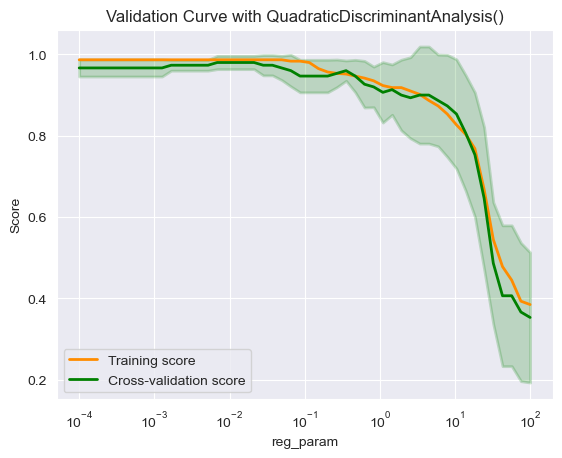

modello: QuadraticDiscriminantAnalysis()
Best parameter: {'reg_param': 0.0022229964825261957}
Best cross-val score: 0.9800000000000001


In [48]:
model2 = QuadraticDiscriminantAnalysis()
validation_curve_pipeline(model2, Xs, ys, "reg_param", np.logspace(-4, 2,50), cv)
grid_search_pipeline(model2,  Xs, ys, "reg_param", np.logspace(-4,2,50), cv)

In questo caso andiamo a studiare il comportamebnto della **Quadratic Discriminant Analysis** sempre in scala logaritmica. Notiamo dal plot che per valori di *reg_param*, ovvero il parametro di regolarizzazione, maggiori di 10 si ha un drastico calo delle prestazioni. Vediamo invece che i valori da 0.1 circa fino a 0.0001 sono quelli che danno prestazioni migliori, intorno a circa il 98%. Questo viene riconfermato dalla grid search che dice che il paramentro migliore per la regolarizzazione è 0.0022 circa con uno score del 98%

/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225

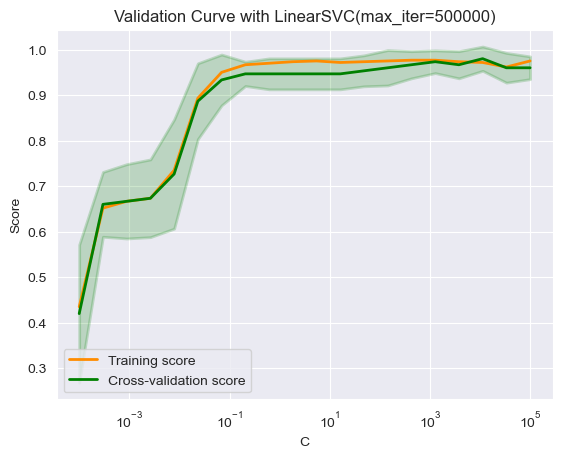

/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225

modello: LinearSVC(max_iter=500000)
Best parameter: {'C': 5.455594781168514}
Best cross-val score: 0.9733333333333334


In [57]:
model3 = LinearSVC(max_iter=500000)
validation_curve_pipeline(model3, Xs, ys, "C",  np.logspace(-4,5,20), cv)
grid_search_pipeline(model3,  Xs, ys, "C",  np.logspace(-4,5,20), cv)

Qui, invece, andiamo a studiare il modello **Support Vector Machines**, che viene regolarizzato moltiplicando per 1/C. Quindi ci aspettiamo che all'aumentare di C il modello aumenti di complessità, ma abbia uno score molto migliore. Se invece C è basso, il modello è più semplice da un punto di vista di complessità ma avrà degli score più bassi. Qesto comportamento è effettivamente ripecchiato dall'andamento del grafico. Tuttavia possiamo notare che il parametro migliore secondo il grafico dovrebbe trovarsi tra $10^{3} e $10^{5} , mentre la grid search restituisce il valore 5.4. Questa discrepanza non so bene come spiegarla, anche se potrebbe derivare dal fatto che settando il modello con *max_iter = 500'000*, comunque non si riesce a convergere a una soluzione (come ci dicono i warnings). Se proviamo a incrementare *max_iter* e parallelizziamo con un certo numero di *n_jobs* il tempo di computazione è troppo elevato per restituire risultati in tempi utili.

In [29]:
def learning_curve_pipeline(model, Xs, ys, cv, n_jobs = 6):
    train_sizes, train_scores, test_scores = learning_curve(model, Xs, ys, cv = cv, n_jobs = n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Learning Curve with " + str(model))
    plt.xlabel(r"Train size")
    plt.ylabel("Score")

    # Plot learning curve
    plt.grid()
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )

    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )

    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.legend(loc="best")

    plt.show()

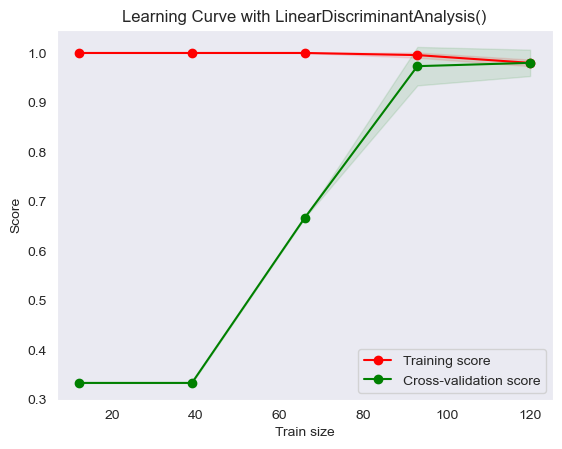

In [30]:
learning_curve_pipeline(LinearDiscriminantAnalysis(), Xs, ys, cv)

La *learning curve* ci permette ci capire il comportamento del modello in base a diverse dimesioni del train e test sets, dando anche dei lower e upper bounds sugli score del modello per questo dataset. Per la **Linear Discriminant Analysis** vediamo che per dimensioni del train size bassi si ha uno score molto basso, andando a fissare il lower bound intorno a 0.33. Invece per dimensioni del train set elevate (120/150) si ha uno score quasi perfetto, intorno a 0.98, anche se la deviazione standard dei parametri è più elevata

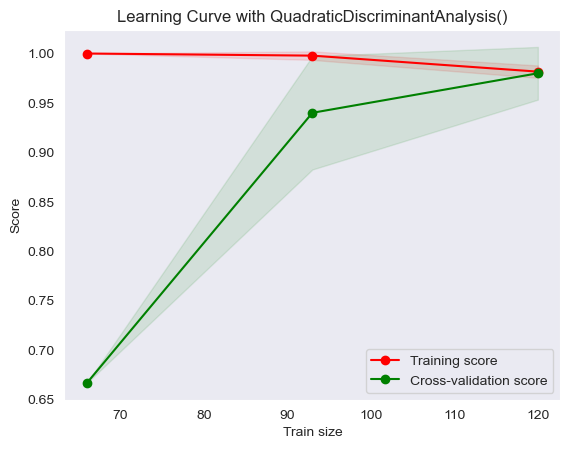

In [31]:
learning_curve_pipeline(QuadraticDiscriminantAnalysis(), Xs, ys, cv)

Per la **Quadratic Discriminant Analysis** si hanno ovviamente prestazioni minori per dimensioni del train size più piccole, ma comunque uno score decente. Quindi il lower bound è fissato a circa 0.65. Anche questo modello per dimensioni del test size elevate ha prestazioni quasi perfette.

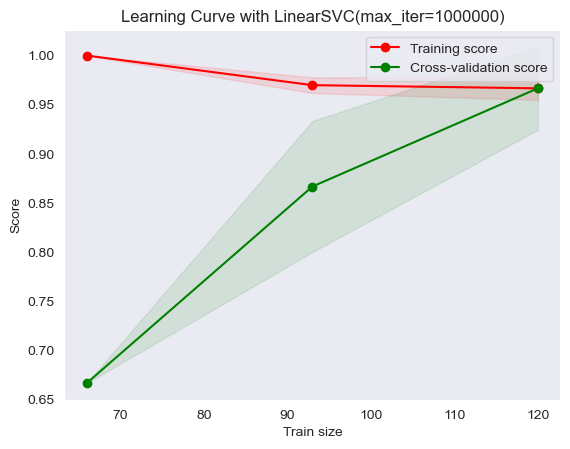

In [32]:
learning_curve_pipeline(LinearSVC(max_iter=1000000), Xs, ys, cv)

I **Suppor Vector Machines** hanno un andamento molto simile al caso precedente, anche se la variazione standard dei parametri è maggiore.

---
## Part 3: A Harder Dataset

OK, now let's switch to a the **digits** dataset which should be a bit more challenging. This should be easy by now, and if you have been careful about **functional abstraction** you should be able to reuse much of the functionality from above.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings('ignore')

ds_digits = load_digits()
df_digits = pd.DataFrame(ds_digits.data)     # Why are there no column names?
targets_digits = pd.Series(ds_digits.target)

### Exercise 3.1: Exploratory data analysis

You know the drill, see what this dataset is made of.

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

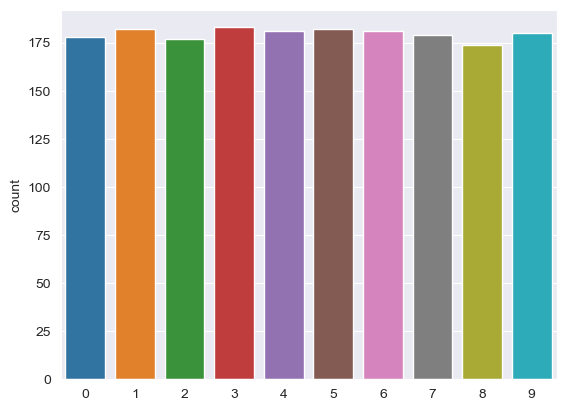

In [37]:
# Your data playground here.
exploratory_data_analysis(ds_digits, df_digits, targets_digits)

**ANALISI**

### Exercise 3.2: Visualize Some Images

Now we are working with (very small) images. There a useful Matplotlib function for visualizing images is `imshow()`. Use it like this:

 `plt.imshow(df_digits.iloc[0,:].to_numpy().reshape(8,8), cmap='gray')`

 **NOTE**: The Pandas DataFrame structure is kind of getting in our way here -- we have to extract a row, then **convert** it to a numpy array, and then **resize** it to (8,8) to view it.

View some images from the dataset.

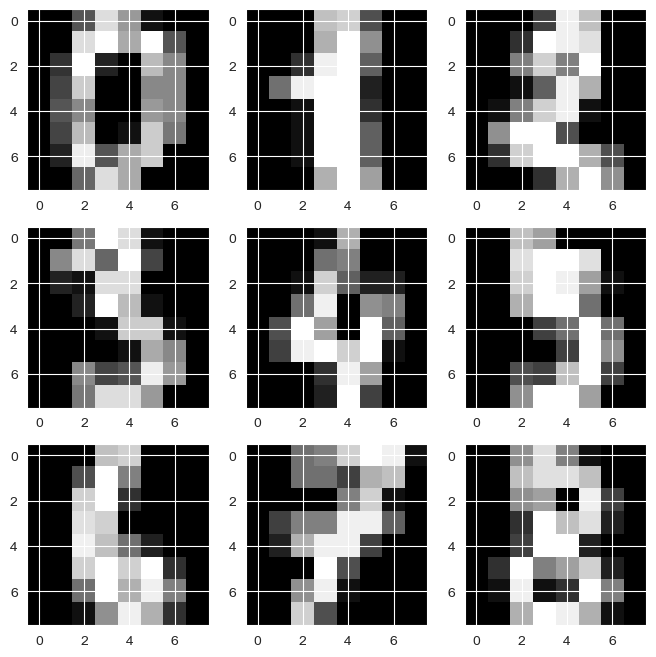

In [38]:
# Your code here.
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(df_digits.iloc[i-1,:].to_numpy().reshape(8,8), cmap='gray')
plt.show()

### Exercise 3.3: Find the best classifier (of the three we have seen)

You should now be very familiar with this game and if you consolidated the pieces you used before, this exercise should be easy. As always, document, summarize, and justify your conclusions and analyses.

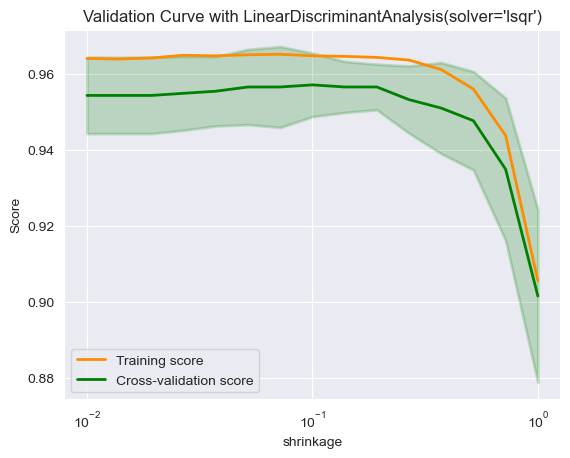

modello: LinearDiscriminantAnalysis(solver='lsqr')
Best parameter: {'shrinkage': 0.07196856730011521}
Best cross-val score: 0.9549303621169916


In [39]:
validation_curve_pipeline(model1, df_digits, targets_digits, "shrinkage", np.logspace(-2, 5,50), cv)
grid_search_pipeline(model1,  df_digits, targets_digits, "shrinkage", np.logspace(-2,5,50), cv)

**ANALISI**

/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  war

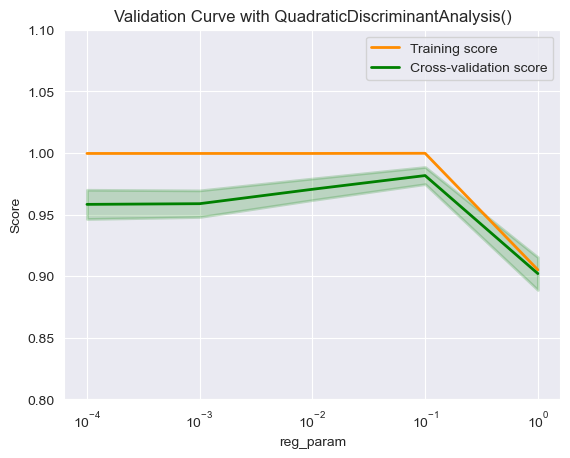

modello: QuadraticDiscriminantAnalysis()
Best parameter: {'reg_param': 0.1}
Best cross-val score: 0.9794073042401733


/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  war

In [46]:
plt.ylim([0.8, 1.1])
#devo farla ad hoc per capire qualcosa
validation_curve_pipeline(model2, df_digits, targets_digits, "reg_param", [0.0001, 0.001, 0.01, 0.1, 1], cv)
grid_search_pipeline(model2,  df_digits, targets_digits, "reg_param", [0.001, 0.01, 0.1, 1], cv)

**ANALISI**

/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225

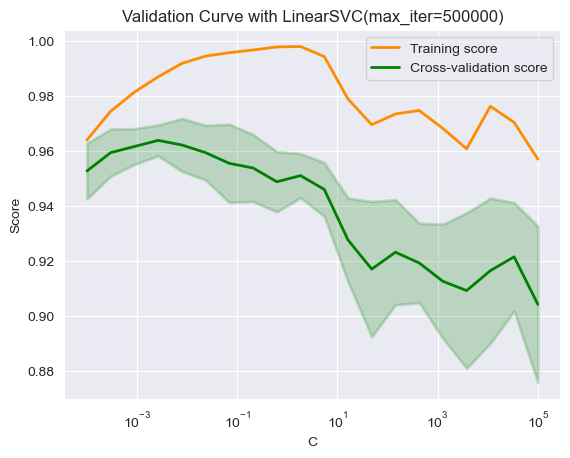

/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225

modello: LinearSVC(max_iter=500000)
Best parameter: {'C': 0.0026366508987303583}
Best cross-val score: 0.9688316310739709


/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [62]:
validation_curve_pipeline(model3, df_digits, targets_digits, "C",  np.logspace(-4,5,20), cv, 15)
grid_search_pipeline(model3,  df_digits, targets_digits, "C",  np.logspace(-4,5,20), cv)

**ANALISI**

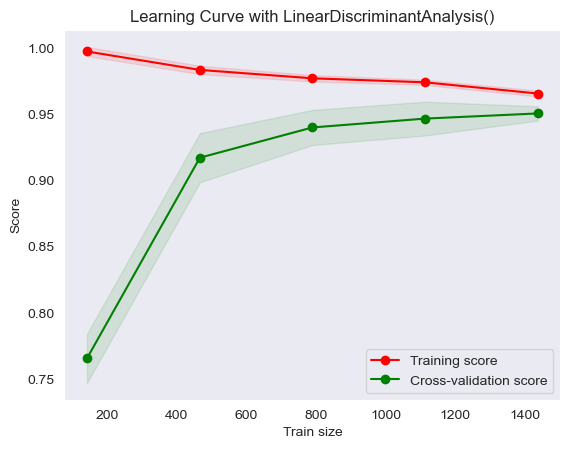

In [58]:
learning_curve_pipeline(LinearDiscriminantAnalysis(), df_digits, targets_digits, cv)

/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/agata/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  war

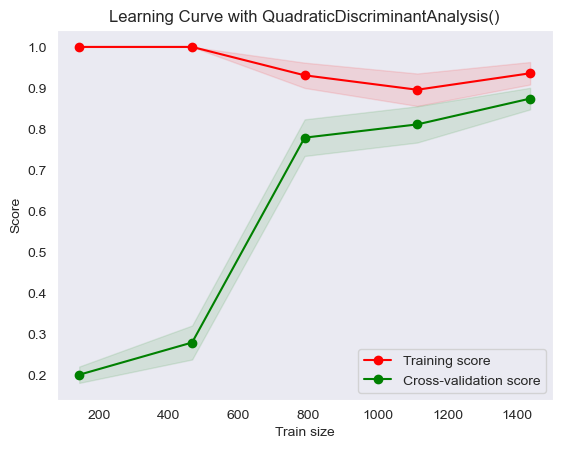

In [59]:
learning_curve_pipeline(QuadraticDiscriminantAnalysis(), df_digits, targets_digits, cv)

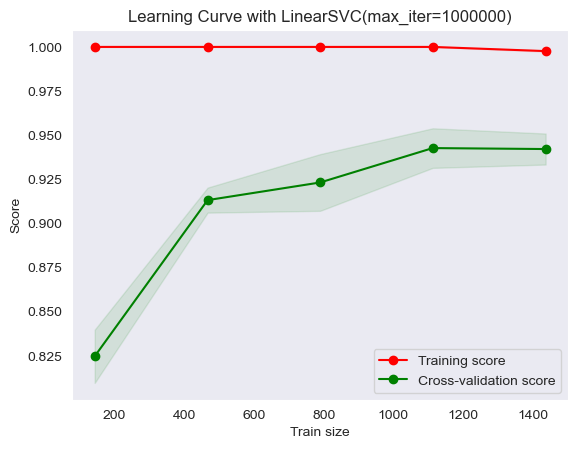

In [60]:
learning_curve_pipeline(LinearSVC(max_iter=1000000), df_digits, targets_digits, cv)

**ANALISI**

In [ ]:
LDA_digits = LinearDiscriminantAnalysis(solver='lsqr')
QDA_digits = QuadraticDiscriminantAnalysis()
SVM_digits = LinearSVC()

grid_search_pipeline(LDA_digits, "shrinkage", np.linspace(0,1,50), cv)
grid_search_pipeline(QDA_digits, "reg_param", np.linspace(0,1,50), cv)
grid_search_pipeline(SVM_digits, "C", np.linspace(0,1000,50), cv)